# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Garda Khoerunnisa
- **Email:** gardakhoerunnisa16062003@gmail.com
- **ID Dicoding:** garda_khoerunnisa_A8Vv




## **Menentukan Pertanyaan Bisnis**

1. Bagaimana Performa Penjualan dan Revenue Perusahan dibeberapa Bulan Terakhir?
2. Kriteria Produk Apa yang Paling diminati Pelanggan ?
3.  Dinegara mana Kita Memiliki Jumlah Pelanggan Terbanyak ?


## **Import Semua Packages/Library yang Digunakan**

In [158]:
pip install streamlit

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Wrangling**

# **Gathering Data**

### **Tabel Customers**

In [160]:
customers=pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### **Tabel Orders**

In [161]:
order=pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/olist_orders_dataset.csv')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### **Tabel Order Item**

In [162]:
order_item=pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/olist_order_items_dataset.csv')
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### **Tabel Produk**

In [163]:
products=pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### **Tabel Seller**

In [164]:
sellers=pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#**Assessing Data**

##**Tabel Customers**

In [165]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [166]:
#Check Missing Value
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [167]:
#Check Data Duplicate
print("Jumlah duplikasi: ", customers.duplicated().sum())

Jumlah duplikasi:  0


In [168]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##**Tabel Orders**

In [169]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [170]:
#Check Missing Value
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [171]:
#Check Data Duplicate
print("Jumlah duplikasi: ", order.duplicated().sum())

Jumlah duplikasi:  0


In [172]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##**Tabel Orders Item**

In [173]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [174]:
#Check Missing Value
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [175]:
#Check Data Duplicate
print("Jumlah duplikasi: ", order_item.duplicated().sum())

Jumlah duplikasi:  0


In [176]:
order_item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##**Tabel Products**

In [177]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [178]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [179]:
print("Jumlah duplikasi: ", products.duplicated().sum())

Jumlah duplikasi:  0


In [180]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##**Tabel Seller**

In [181]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [182]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [183]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


In [184]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


# **Cleaning Data**

## **Tabel Order**

In [202]:
#menangani kesalahan tipe data
datetime_columns = ["order_purchase_timestamp", "order_approved_at",
                    "order_delivered_carrier_date", "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
    order[column] = pd.to_datetime(order[column], errors='coerce')

In [203]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [187]:
#menangani missing value di data order
order[order.order_approved_at .isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [188]:
#menangani missing value
order["order_approved_at"].fillna(order['order_status'], inplace=True)
order["order_delivered_carrier_date"].fillna(order['order_status'], inplace=True)
order["order_delivered_customer_date"].fillna(order['order_status'], inplace=True)

In [189]:
order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

## **Tabel Order Item**

In [190]:
#menangani kesalahan tipe data pada shipping_limit_date
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_item[column] = pd.to_datetime(order_item[column])

In [191]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## **Tabel Products**

In [192]:
# Menggantikan missing values pada product_category_name dengan "Others"
products['product_category_name'].fillna('Others', inplace=True)

# Menggantikan missing values pada product_name_lenght dengan nilai mean
products['product_name_lenght'].fillna(products['product_name_lenght'].mean(), inplace=True)

# Menggantikan missing values pada product_description_lenght dengan nilai mean
products['product_description_lenght'].fillna(products['product_description_lenght'].mean(), inplace=True)

# Menggantikan missing values pada product_photos_qty dengan nilai mean
products['product_photos_qty'].fillna(products['product_photos_qty'].mean(), inplace=True)

# Menggantikan missing values pada product_weight_g dengan nilai mean
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)

# Menggantikan missing values pada product_length_cm dengan nilai mean
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)

# Menggantikan missing values pada product_height_cm  dengan nilai mean
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)

# Menggantikan missing values pada product_width_cm dengan nilai mean
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)

In [193]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#**Exploratory Data Analysis (EDA)**

## **Tabel Customers**

In [194]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### **Demografi Customer berdasarkan Negara**

In [195]:
customers.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### **Demografi Customer Berdasarkan State**

In [196]:
customers.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

### **Sebaran Customer Berdasarkan Negara dan State**

In [197]:
result = customers.groupby(['customer_state', 'customer_city']).customer_unique_id.nunique().sort_values(ascending=False)
result.head(10)

customer_state  customer_city        
SP              sao paulo                14984
RJ              rio de janeiro            6620
MG              belo horizonte            2672
DF              brasilia                  2069
PR              curitiba                  1465
SP              campinas                  1398
RS              porto alegre              1326
BA              salvador                  1209
SP              guarulhos                 1153
                sao bernardo do campo      908
Name: customer_unique_id, dtype: int64

##**Tabel Order**

In [198]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


### **status pesanan**

In [199]:
order.groupby(by="order_status").agg({"order_id": "nunique"}).sort_values(by="order_id", ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### **Estimasi Proses Barang dikirimkan ke Customer dari Sesudah Melakukan Pembayaran**

In [204]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [205]:
delivered_carrier_date = order["order_delivered_customer_date"] - order["order_approved_at"]
delivered_carrier_date = delivered_carrier_date.apply(lambda x: x.total_seconds())
order["delivered_carrier_date"] = round(delivered_carrier_date/86400)
order.head().sort_values(by="delivered_carrier_date" , ascending= False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_carrier_date
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


## **Tabel Order dan Customers**

### **Mencari Tahu Banyaknya Customer yang Active**

In [206]:
customer_id_in_order =  order.customer_id.tolist()
customers["customer_status"] = customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order else "Non Active")
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
69411,a16c7e7bd772bc541be94b7a25c1a906,7f3e5bfe3c5927b987d875d005af1934,6790,taboao da serra,SP,Active
68970,09e2f116cdbdd143542837276b1e91ea,3a690d57ffe6162386eade1f0ee685d9,3925,sao paulo,SP,Active
48863,9fe0f1e8a4b461fc59cc93ed610e8d8e,34f621d6b7b92ad2d4e895315af716a4,86046,londrina,PR,Active
16820,f2ff0d9dacfcb09769716880fb94eccc,1d6ef3948c8800fd687fbeab2bb7f5e2,38550,coromandel,MG,Active
50619,7bb166661778505b89811ebab082883b,c0b64e84c7ec378cd26a904ce0f29764,8253,sao paulo,SP,Active


In [208]:
customers.groupby(by="customer_status").customer_id.count()

customer_status
Active    99441
Name: customer_id, dtype: int64

In [209]:
orders_customers = pd.merge(
    left=order,
    right=customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_carrier_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


### **Jumlah Order Berdasarkan City**

In [210]:
orders_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


### **Jumlah Order Berdasarkan State**

In [211]:
orders_customers.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


## **Tabel Order Items**

In [212]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [213]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### **Total Pembayaran**

In [214]:
order_item ["total_payment"] = order_item["price"] + order_item["freight_value"]
order_item.head().sort_values(by="total_payment" , ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_payment
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78


## **Tabel Order dan Order Item**

###**Status Penyerahan Barang ke Pengiriman**

In [215]:
order_id_in_order_item = order_item.order_id.tolist()
order["status_order_delivered_carrier_date"] = (order["order_delivered_carrier_date"] - order_item["shipping_limit_date"]).dt.days.apply(
    lambda x: "faster" if x < 0 else ("on time" if x == 0 else "late")
)
order.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_carrier_date,status_order_delivered_carrier_date
93316,2346e1104a4b18a23e6dc6a87c2d1b8c,00072d033fe2e59061ae5c3aff1a2be5,delivered,2017-09-01 09:24:39,2017-09-02 02:50:58,2017-09-05 13:16:55,2017-09-14 18:33:48,2017-09-27,13.0,late
60393,fa5927f07ada4f44128f6d9fab3b70f6,8af801d95c9bc9bd7cfa7845826e4b72,delivered,2018-02-02 10:18:13,2018-02-02 10:33:16,2018-02-02 21:36:24,2018-02-24 10:53:14,2018-03-08,22.0,faster
75959,b6424d3ecaedf5f49836d503d4f0d671,246d1b806d240465bc8c33f4d80eb4c3,delivered,2018-07-22 15:43:14,2018-07-23 12:32:19,2018-07-23 13:25:00,2018-07-28 16:18:35,2018-08-10,5.0,faster
10302,5e0de5e6b42042ea6e00e3d07d4aef84,282cb5fd8f77b5adc7a04bbf77f8ae52,delivered,2017-11-25 00:54:17,2017-11-25 03:32:49,2017-11-30 00:36:53,2018-01-10 20:48:57,2017-12-20,47.0,faster
83687,64aea51c84f7779855364184e8ce95f1,f5d72595f4873c80a5d8846e2e773b7e,delivered,2018-03-30 15:47:09,2018-03-30 16:27:11,2018-04-07 01:28:43,2018-05-08 18:27:51,2018-04-26,39.0,faster


In [216]:
order.groupby(by="status_order_delivered_carrier_date").order_id.count().sort_values(ascending = False)

status_order_delivered_carrier_date
late       49761
faster     49449
on time      231
Name: order_id, dtype: int64

In [217]:
order_order_item = pd.merge(
    left=order_item,
    right=order,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_carrier_date,status_order_delivered_carrier_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,faster
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,late
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,late
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,late
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,faster


## **Tabel All Order**

In [218]:
order_all = pd.merge(
    left=order_order_item,
    right=orders_customers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_payment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_carrier_date,status_order_delivered_carrier_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,faster
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,late
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,late
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,late
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,faster


In [219]:
order_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   order_id                             112650 non-null  object        
 1   order_item_id                        112650 non-null  int64         
 2   product_id                           112650 non-null  object        
 3   seller_id                            112650 non-null  object        
 4   shipping_limit_date                  112650 non-null  datetime64[ns]
 5   price                                112650 non-null  float64       
 6   freight_value                        112650 non-null  float64       
 7   total_payment                        112650 non-null  float64       
 8   customer_id_x                        112650 non-null  object        
 9   order_status_x                       112650 non-null  object        
 

### **Customers dengan Jumlah Pemesanan Terbanyak**

In [220]:
order_terbanyak = order_all.groupby(by="customer_id_x").order_id.count().sort_values(ascending = False)
order_terbanyak.head(10)

customer_id_x
fc3d1daec319d62d49bfb5e1f83123e9    21
be1b70680b9f9694d8c70f41fa3dc92b    20
bd5d39761aa56689a265d95d8d32b8be    20
adb32467ecc74b53576d9d13a5a55891    15
10de381f8a8d23fff822753305f71cae    15
a7693fba2ff9583c78751f2b66ecab9d    14
d5f2b3f597c7ccafbb5cac0bcc3d6024    14
7d321bd4e8ba1caf74c4c1aabd9ae524    13
3b54b5978e9ace64a63f90d176ffb158    12
daf15f1b940cc6a72ba558f093dc00dd    12
Name: order_id, dtype: int64

## **Tabel Seller**

In [221]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **Demograsi Seller Berdasarkan State**

In [222]:
sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### **Demograsi Seller Berdasarkan City**

In [223]:
sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

### **Demograsi Seller Berdasarkan State dan City**

In [224]:
sellers.groupby(by=["seller_city", "seller_state"]).seller_id.nunique().sort_values(ascending=False)
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


## **Tabel Order Items dan Seller**

In [225]:
seller_order_item = pd.merge(
    left=order_item,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
seller_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_payment,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,87900,loanda,PR


### **Seller dengan penjualan terbanyak**

In [226]:
seller_order_item .groupby(by="seller_id").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by = "order_id", ascending= False)

,order_id,price
seller_id,,
6560211a19b47992c3666cc44a7e94c0,1854,123304.83
4a3ca9315b744ce9f8e9374361493884,1806,200472.92
cc419e0650a3c5ba77189a1882b7556a,1706,104288.42
1f50f920176fa81dab994f9023523100,1404,106939.21
da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57
...,...,...
ceb7b4fb9401cd378de7886317ad1b47,1,399.90
cecd97bc34ed8330bd4cd15713eda670,1,57.99
5b92bfa4120daa27c574daa2e386c693,1,14.00


## **Tabel Seller Order Item dan Tabel Products**

In [227]:
sales_product = pd.merge(
    left=seller_order_item,
    right=products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_payment,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


### **Produk dengan Harga Termahal**

In [228]:
product_termahal = sales_product.groupby(by="price").agg({"product_category_name": "sum"}).sort_values(by="price", ascending=False)
product_termahal.head(10)

,product_category_name
price,
6735.00,utilidades_domesticas
6729.00,pcs
6499.00,artes
4799.00,eletroportateis
4690.00,eletroportateis
4590.00,pcs
4399.87,instrumentos_musicais
4099.99,consoles_games
4059.00,esporte_lazer


### **Product Berdasarkan Tipe**

In [229]:
sales_product.groupby(by="product_category_name").agg({
    "product_id": "nunique","price":  ["min", "max"]})

product_id  price         
                             nunique    min      max
product_category_name                               
Others                           610   3.00  3980.00
agro_industria_e_comercio         74  12.99  2990.00
alimentos                         82   9.99   274.99
alimentos_bebidas                104   6.50   699.90
artes                             55   3.50  6499.00
...                              ...    ...      ...
sinalizacao_e_seguranca           93   4.50   740.00
tablets_impressao_imagem           9  14.90   889.99
telefonia                       1134   5.00  2428.00
telefonia_fixa                   116   6.00  1790.00
utilidades_domesticas           2335   3.06  6735.00

[74 rows x 3 columns]

### **Product Terlaris**

In [230]:
product_terlaris = sales_product.groupby(by="product_category_name").agg({
    "seller_id": "nunique",
    "price": "sum"
})
product_terlaris.head(10)

,seller_id,price
product_category_name,,
Others,257,179535.28
agro_industria_e_comercio,34,72530.47
alimentos,58,29393.41
alimentos_bebidas,34,15179.48
artes,36,24202.64
artes_e_artesanato,13,1814.01
artigos_de_festas,12,4485.18
artigos_de_natal,17,8800.82
audio,36,50688.50


##**Data All**

In [231]:
all_df = pd.merge(
    left=sales_product,
    right=order_all,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,total_payment_x,seller_zip_code_prefix,seller_city,...,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,delivered_carrier_date_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,27277,volta redonda,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,3471,sao paulo,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,37564,borda da mata,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,14403,franca,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,87900,loanda,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,Active


### **Preferensi Pembelian Berdasarkan State pelanggan dan Tipe Produk**

In [232]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({"price_x": "sum"})

price_x
customer_state product_category_name               
AC             Others                         66.90
               artigos_de_natal               69.90
               automotivo                    540.98
               bebes                         697.84
               beleza_saude                 1756.38
...                                             ...
TO             portateis_casa_forno_e_cafe  1999.00
               relogios_presentes           6172.89
               telefonia                    1314.10
               telefonia_fixa               1390.99
               utilidades_domesticas        1421.33

[1394 rows x 1 columns]

# **Explanatory Data**

## **Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir**

In [233]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at_y').agg({
    "order_id": "nunique",
    "price_x": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price_x": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_approved_at_y,order_count,revenue
0,2016-09,1,404.91
1,2016-10,310,62701.48
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,752,157175.64


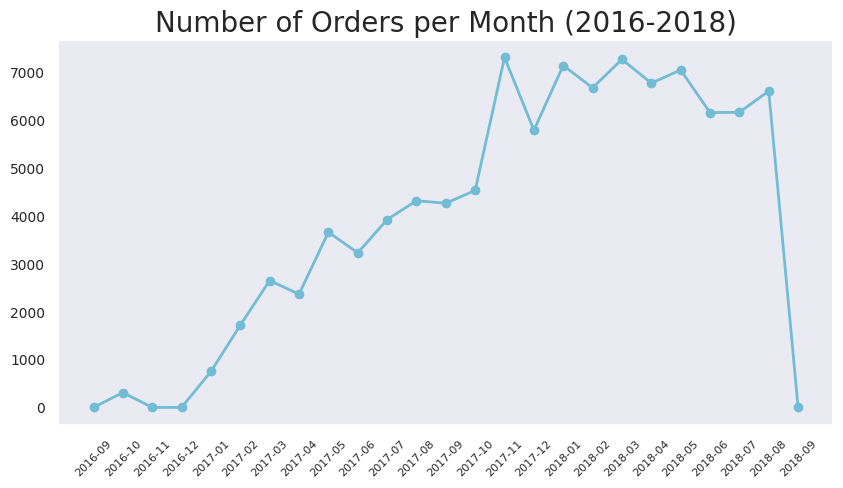

In [235]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_approved_at_y"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=8, rotation = 45)
plt.yticks(fontsize=10)
plt.show()

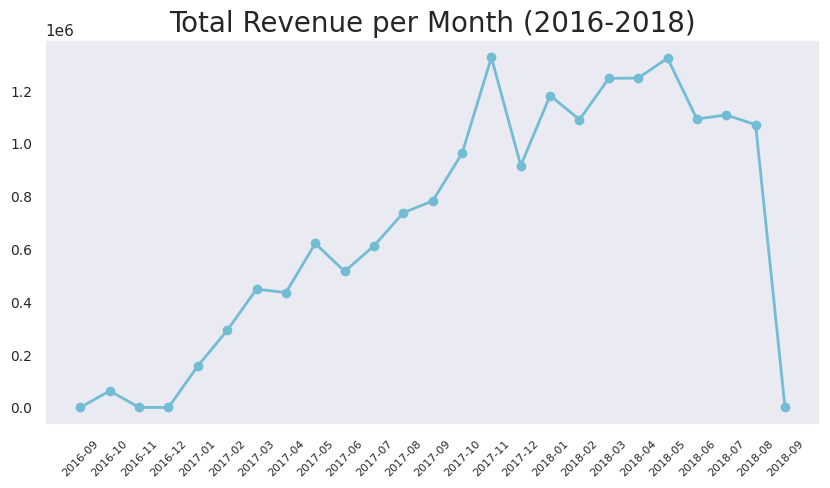

In [236]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_approved_at_y"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=8, rotation = 45)
plt.yticks(fontsize=10)
plt.show()

## **Produk dengan Hasil Penjualan Terbesar**

In [237]:
sum_order_items_df = all_df.groupby(by="product_category_name").agg({
    "price_x": "sum"
})
sum_order_items_df.head(10)

,price_x
product_category_name,
Others,216222.80
agro_industria_e_comercio,110333.05
alimentos,36582.11
alimentos_bebidas,20309.47
artes,26391.92
artes_e_artesanato,1904.70
artigos_de_festas,4966.28
artigos_de_natal,13933.98
audio,53435.21


<ipython-input-238-7708d237afe0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price_x", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-238-7708d237afe0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price_x", y="product_category_name", data=sum_order_items_df.sort_values(by="price_x", ascending=True).head(5), palette=colors, ax=ax[1])


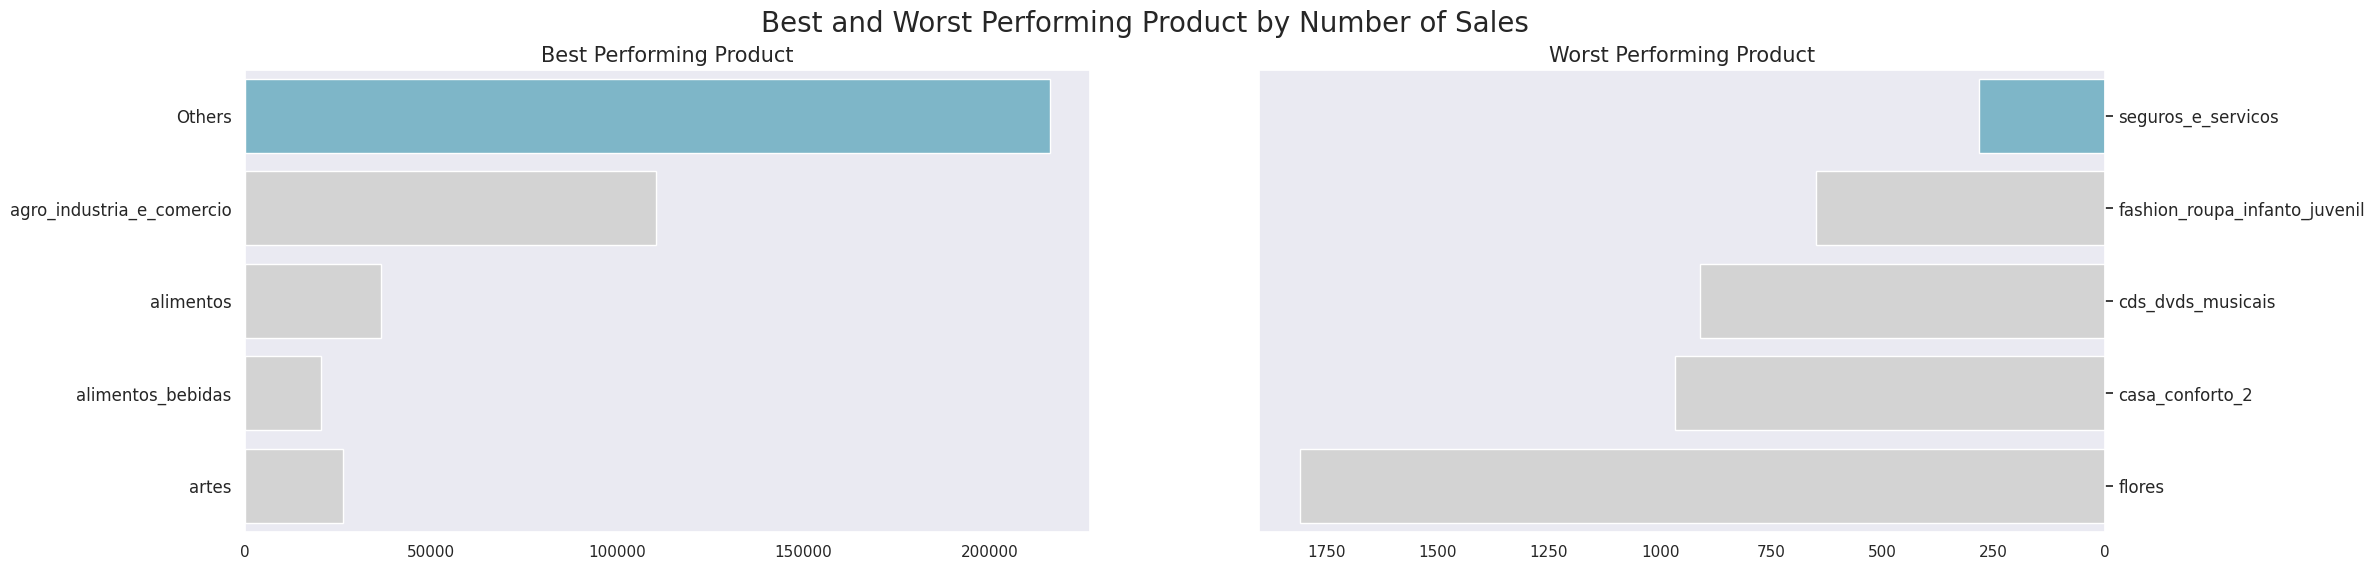

In [238]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price_x", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="price_x", y="product_category_name", data=sum_order_items_df.sort_values(by="price_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## **Demograsi Pelanggan**

### **Berdasarkan States**

<ipython-input-245-f1c7afd5015e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-245-f1c7afd5015e>:10: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
<ipython-input-245-f1c7afd5015e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-245-f1c7afd5015e>:23: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


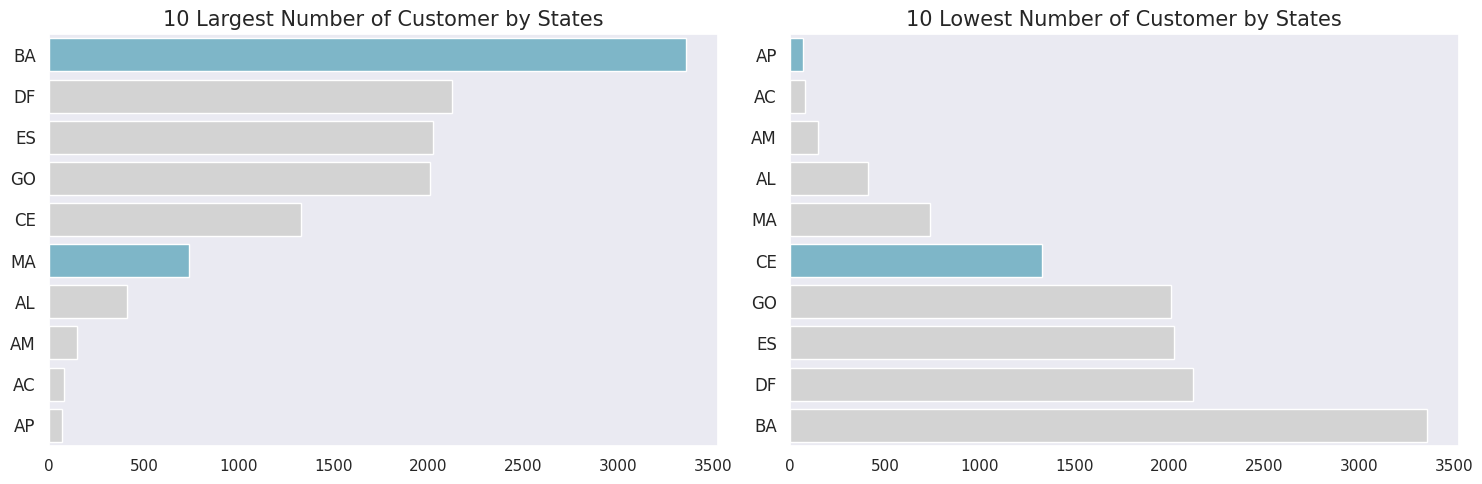

In [245]:
# Data preparation
bystate_df = all_df.groupby(by="customer_state").customer_id_x.nunique().reset_index().head(10)
bystate_df.rename(columns={"customer_id_x": "customer_count"}, inplace=True)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot 1: 10 Largest Number of Customer by States
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors,
    ax=axes[0]  # Use the first subplot
)
axes[0].set_title("10 Largest Number of Customer by States", loc="center", fontsize=15)
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: 10 Lowest Number of Customer by States
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=True),
    palette=colors,
    ax=axes[1]  # Use the second subplot
)
axes[1].set_title("10 Lowest Number of Customer by States", loc="center", fontsize=15)
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## **RFM Analisis**

In [248]:
rfm_df = all_df.groupby(by="customer_id_x", as_index=False).agg({
    "order_purchase_timestamp_x": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price_x": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


<ipython-input-249-c489d3f58bb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-249-c489d3f58bb3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-249-c489d3f58bb3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

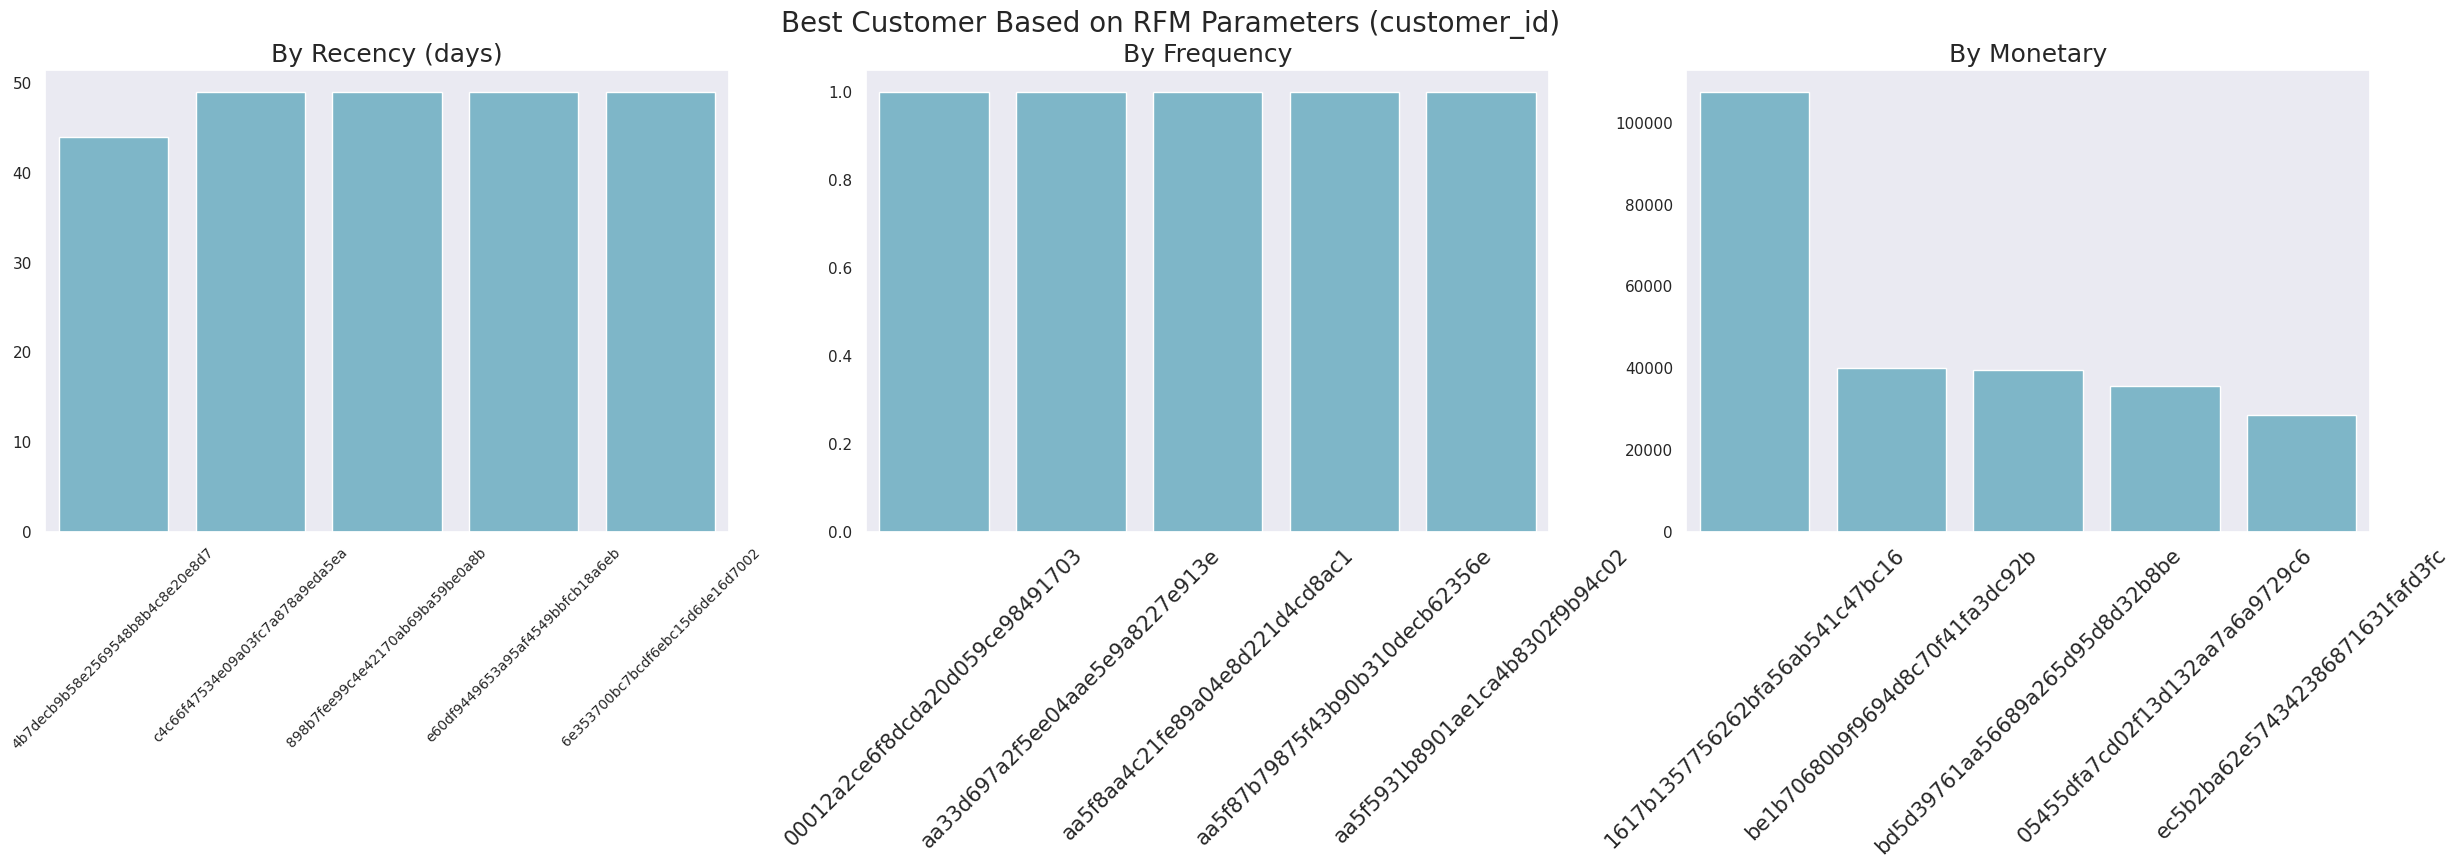

In [249]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10, rotation = 45)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation = 45)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation = 45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [250]:
all_df.to_csv("all_data.csv", index=False)